In [41]:
%matplotlib inline 
#It guarantees that Jupyter plots your charts
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from scipy import stats     #simple linear regression
from scipy.optimize import curve_fit #nonlinear regression
from scipy.optimize import least_squares  #nonlinear regression

In [2]:
def F(a0,k,M,m,n):   
    global a
    a=[a0]
    for i in range(0,n-1):
        a.append(a[i]+k*(M-a[i])*(a[i]-m))
    return a

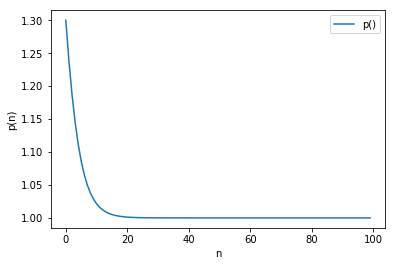

In [3]:
def F(p0,alpha,beta,gamma,n):   
    global p
    p=[p0]
    for i in range(0,n-1):
        p.append(((p[i]**2)*(alpha-beta)+beta*p[i])/((p[i]**2)*(alpha-2*beta+gamma)+2*p[i]*(beta-gamma) +gamma))
    return p
n=100
t=[x for x in range(0,n)]
alpha,beta,gamma=0.4,0.3,0.1
plt.plot(t,F(1.3,alpha,beta,gamma,n),label='p()')
plt.xlabel('n'), plt.ylabel('p(n)')
plt.legend()
plt.show()

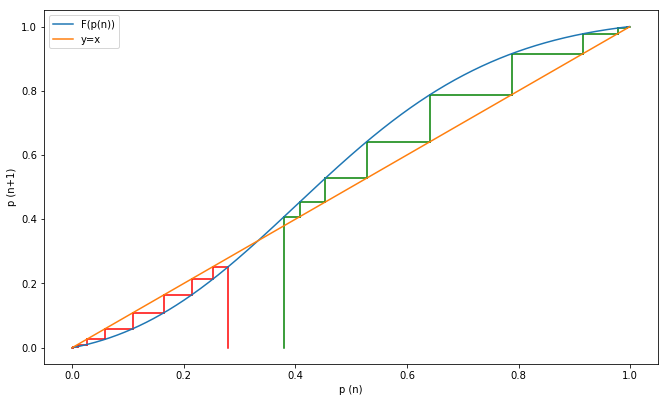

In [61]:
p=[0.001*i for i in range(0,1000)]
alpha,beta,gamma=0.5,0.1,0.3
P=[]
for i in range(0,len(p)):
    P.append(((p[i]**2)*(alpha-beta)+beta*p[i])/((p[i]**2)*(alpha-2*beta+gamma)+2*p[i]*(beta-gamma) +gamma))
#------------------------------------------------------------------------------------------------------------
def Func(x,alpha,beta,gamma):
    w=((x**2)*(alpha-beta)+beta*x)/((x**2)*(alpha-2*beta+gamma)+2*x*(beta-gamma) +gamma)
    return w
#------------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(11, 6.5))
x0,y0=0.28, 0
for i in range (0,20):
    x1,y1=x0, Func(x0,alpha,beta,gamma)
    plt.plot([x0,x1],[y0,y1],'r-')
    plt.plot([x1,y1],[y1,y1],'r-')
    x0,y0=y1,y1
    
x0,y0=0.38, 0
for i in range (0,20):
    x1,y1=x0, Func(x0,alpha,beta,gamma)
    plt.plot([x0,x1],[y0,y1],'g-')
    plt.plot([x1,y1],[y1,y1],'g-')
    x0,y0=y1,y1
#------------------------------------------------------------------------------------------------------------    
plt.plot(p,P,label='F(p(n))')
plt.plot(p,p,label='y=x')
plt.xlabel('p (n)'), plt.ylabel('p (n+1)')
plt.legend()
plt.savefig('Tela4.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


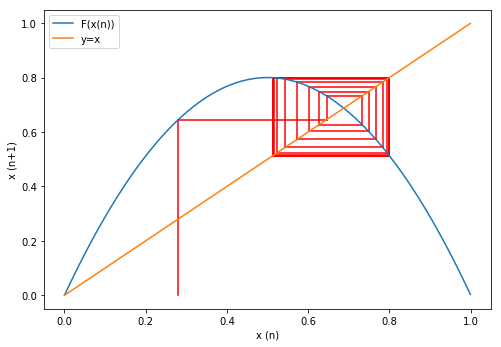

In [40]:
def logisticmap(x, r):
    return x * r * (1 - x)

p=[0.001*i for i in range(0,1000)]
P=[]

r=3.2
for i in range(0,len(p)):
    P.append(p[i]*r*(1-p[i]))
#------------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5.5))
x0,y0=0.28, 0
for i in range (0,20):
    x1,y1=x0, logisticmap(x0,r)
    plt.plot([x0,x1],[y0,y1],'r-')
    plt.plot([x1,y1],[y1,y1],'r-')
    x0,y0=y1,y1
    
#------------------------------------------------------------------------------------------------------------    
plt.plot(p,P,label='F(x(n))')
plt.plot(p,p,label='y=x')
plt.xlabel('x (n)'), plt.ylabel('x (n+1)')
plt.legend()
plt.savefig('atractor.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


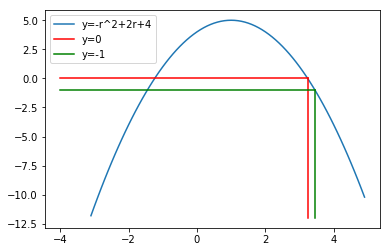

In [37]:
def rrr(x):
    return -(x**2)+2*x+4
x=[0.1*i for i in range(-31,50)]
r=[]
for i in range(0,len(x)):
    r.append(rrr(x[i]))
plt.plot(x,r,label='y=-r^2+2r+4')
plt.plot([1+np.sqrt(5),1+np.sqrt(5)],[0,-12],'r',label='y=0')
plt.plot([-4,1+np.sqrt(5)],[0,0],'r')
plt.plot([-4,1+np.sqrt(6)],[-1,-1],'g',label='y=-1')
plt.plot([1+np.sqrt(6),1+np.sqrt(6)],[-1,-12],'g')
plt.legend()
plt.savefig('r.pdf', format='pdf', dpi=1000, bbox_inches='tight')

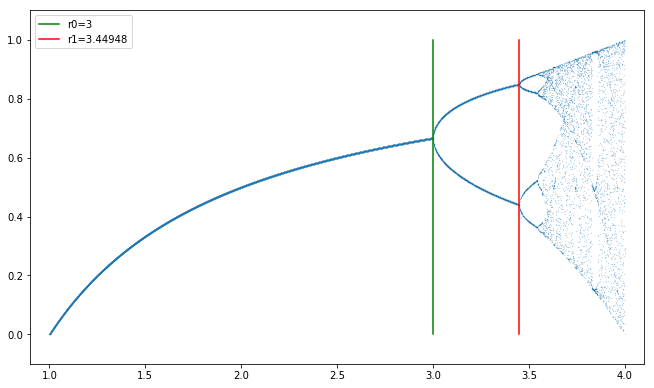

In [44]:
from pylab import show, scatter, xlim, ylim
from random import randint
fig, ax = plt.subplots(figsize=(11, 6.5))
iter = 1000         # Number of iterations per point
seed = 0.5          # Seed value for x in (0, 1)
spacing = .0001     # Spacing between points on domain (r-axis)
res = 8             # Largest n-cycle visible
# Initialize r and x lists
rlist = []
xlist = []
def logisticmap(x, r):
    return x * r * (1 - x)
# Return nth iteration of logisticmap(x. r)
def iterate(n, x, r):
    for i in range(1,n):
        x = logisticmap(x, r)
    return x
# Generate list values -- iterate for each value of r
for r in [i * spacing for i in range(int(1/spacing),int(4/spacing))]:
   rlist.append(r) 
   xlist.append(iterate(randint(iter-res/2,iter+res/2), seed, r))
scatter(rlist, xlist, s = .01)
xlim(0.9, 4.1)
ylim(-0.1,1.1)
plt.plot([3,3],[0,1],'g',label='r0=3')
plt.plot([3.44948,3.44948],[0,1],'r',label='r1=3.44948')
plt.legend()
plt.savefig('bifurcacion.pdf', format='pdf', dpi=1000, bbox_inches='tight')
show()

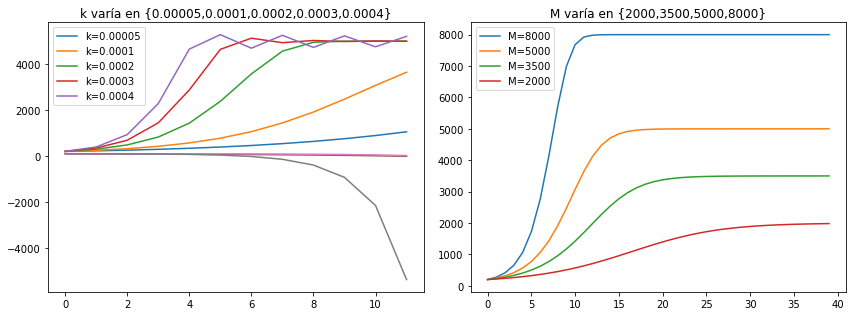

In [160]:
fig, ax = plt.subplots(figsize=(12, 4.5))
plt.subplot(121)
n=12
t=[x for x in range(0,n)]
plt.title('k varía en {0.00005,0.0001,0.0002,0.0003,0.0004}')
plt.plot(t,F(200,0.00005,5000,100,n),label='k=0.00005')
plt.plot(t,F(200,0.0001,5000,100,n),label='k=0.0001')
plt.plot(t,F(200,0.0002,5000,100,n),label='k=0.0002')
plt.plot(t,F(200,0.0003,5000,100,n),label='k=0.0003')
plt.plot(t,F(200,0.0004,5000,100,n),label='k=0.0004')
plt.plot(t,F(90,0.00005,5000,100,n))
plt.plot(t,F(99,0.0001,5000,100,n))
plt.plot(t,F(98,0.0002,5000,100,n))
plt.legend()

#------------------
plt.subplot(122)
n=40
t=[x for x in range(0,n)]
plt.title('M varía en {2000,3500,5000,8000}')
plt.plot(t,F(200,0.0001,8000,100,n),label='M=8000')
plt.plot(t,F(200,0.0001,5000,100,n),label='M=5000')
plt.plot(t,F(200,0.0001,3500,100,n),label='M=3500')
plt.plot(t,F(200,0.0001,2000,100,n),label='M=2000')
plt.legend()
#------------------
plt.tight_layout()
plt.savefig('Población.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

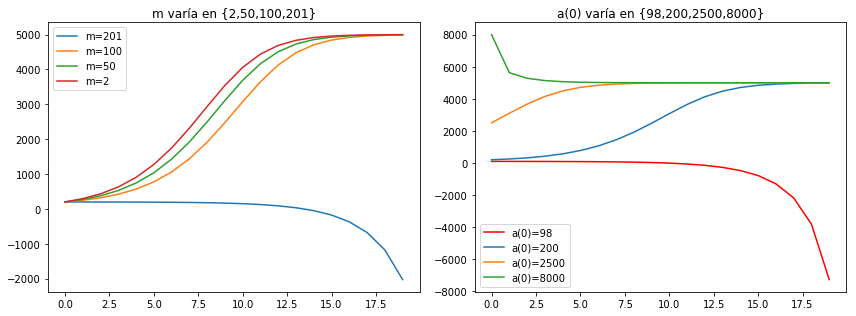

In [158]:
fig, ax = plt.subplots(figsize=(12, 4.5))
plt.subplot(121)
n=20
t=[x for x in range(0,n)]
plt.title('m varía en {2,50,100,201}')
plt.plot(t,F(200,0.0001,5000,201,n),label='m=201')
plt.plot(t,F(200,0.0001,5000,100,n),label='m=100')
plt.plot(t,F(200,0.0001,5000,50,n),label='m=50')
plt.plot(t,F(200,0.0001,5000,2,n),label='m=2')
plt.legend()
#------------------
plt.subplot(122)
plt.title('a(0) varía en {98,200,2500,8000}')
plt.plot(t,F(98,0.0001,5000,100,n),label='a(0)=98',color='r')
plt.plot(t,F(200,0.0001,5000,100,n),label='a(0)=200')
plt.plot(t,F(2500,0.0001,5000,100,n),label='a(0)=2500')
plt.plot(t,F(8000,0.0001,5000,100,n),label='a(0)=8000')
plt.legend()

plt.tight_layout()
plt.savefig('Población2.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()